### Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

### Loading data

In [68]:
data = pd.read_csv("C:\\Users\\venka\\Documents\\TPO\\WineQT.csv")

### Dataset Study

In [69]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [70]:
data.drop('Id',axis=1,inplace=True)

In [71]:
data.shape

(1143, 12)

The dataset has 1143 observations and 12 characteristics.

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


The dataset has no null values and contains only float and integer values.


In [73]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Basic Statistics Summary.

In [74]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

1,2,9 and 10 Quality ratings are not given by any observations. Only Scores obtained are between 3 and 8.


### Data Correlation

In [75]:
data.corr()['quality'].sort_values()

volatile acidity       -0.407394
total sulfur dioxide   -0.183339
density                -0.175208
chlorides              -0.124085
free sulfur dioxide    -0.063260
pH                     -0.052453
residual sugar          0.022002
fixed acidity           0.121970
citric acid             0.240821
sulphates               0.257710
alcohol                 0.484866
quality                 1.000000
Name: quality, dtype: float64

### Data Visualization

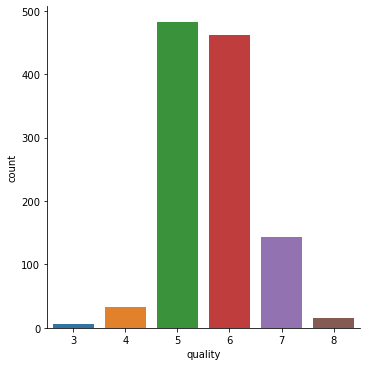

In [76]:
sns.catplot(x='quality',kind='count',data=data,height=5)

Quality has more values in Categories 5,6 and 7. 

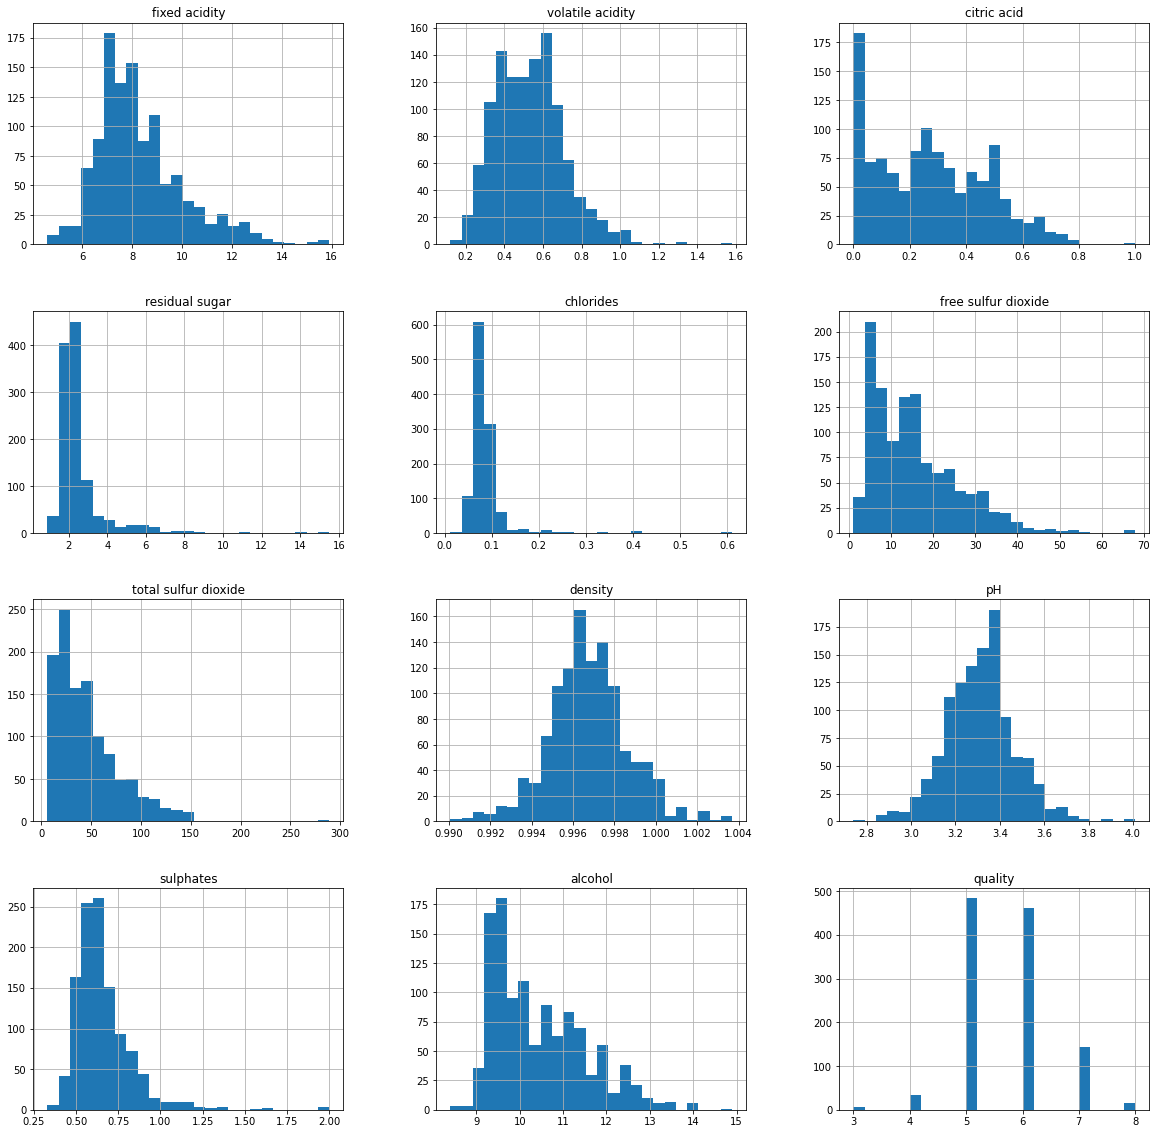

In [77]:
data.hist(bins=25,figsize=(20,20))
plt.show()

Data Distributio on Features.

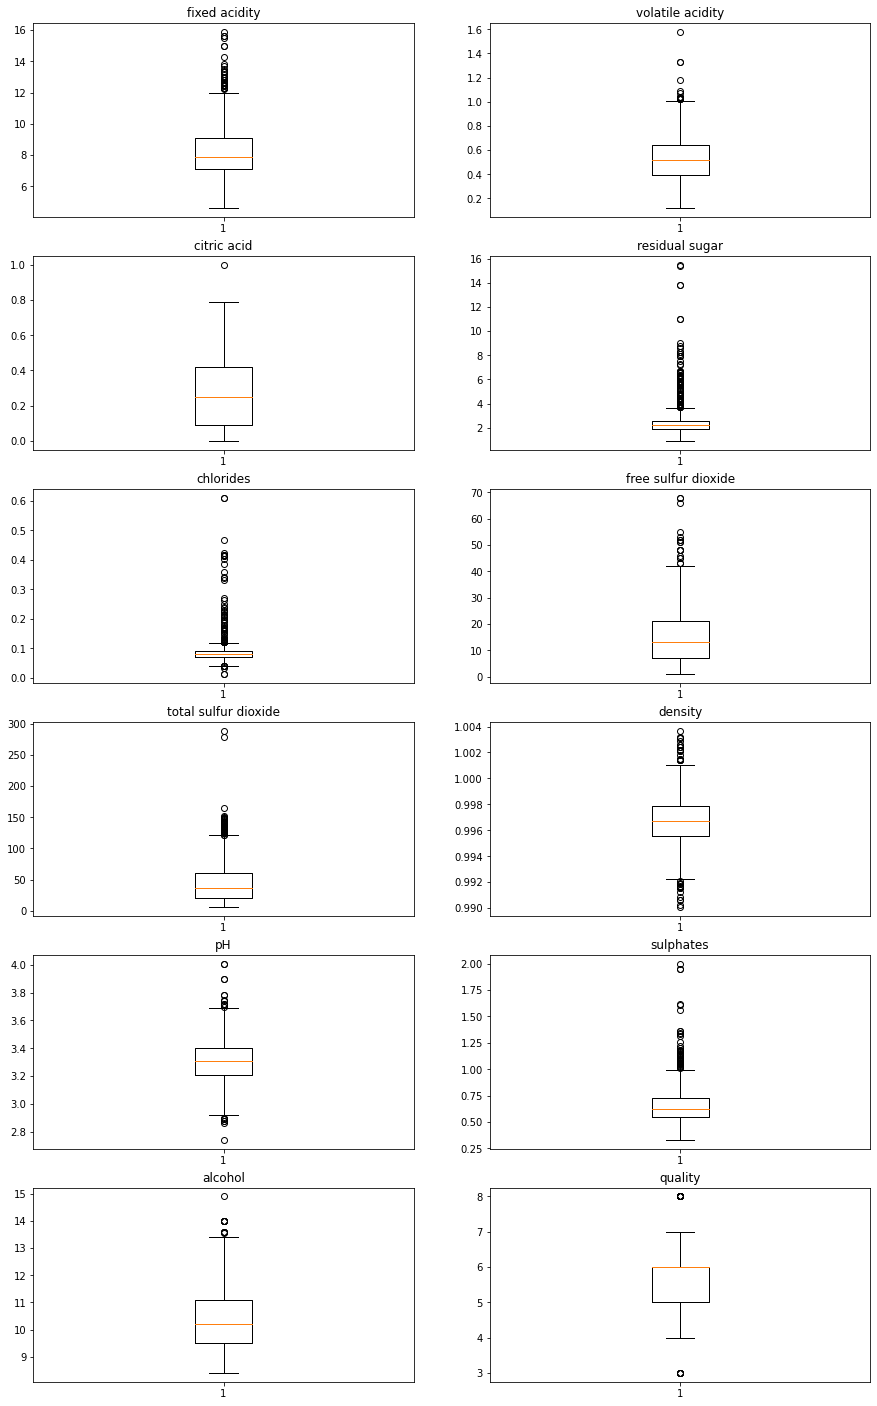

In [78]:
plt.figure(figsize = (15,25))
count = 1
for col in data.columns:
    plt.subplot(6,2,count)
    plt.boxplot(data[col])
    plt.title(col)
    count += 1
plt.show()

All the Features show outliers.

<AxesSubplot:>

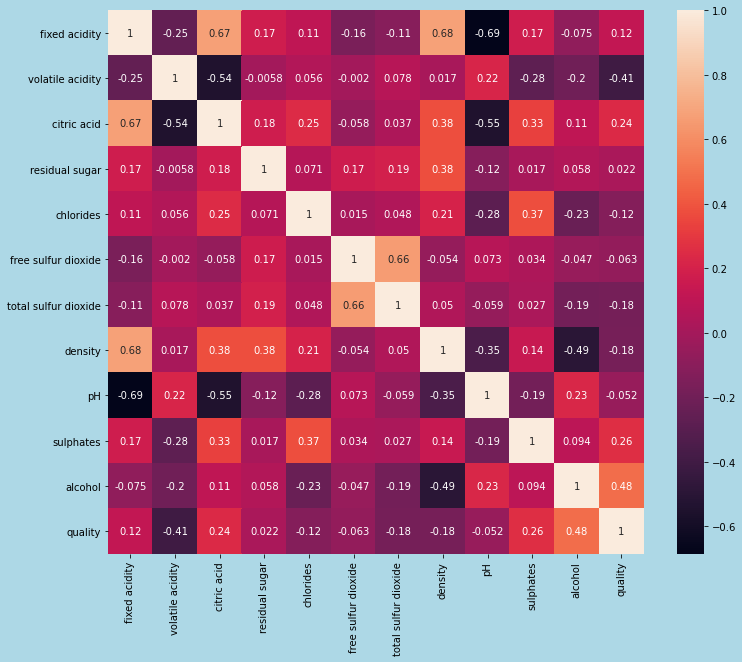

In [79]:
fig, ax = plt.subplots(figsize=[12,10],facecolor='lightblue')
corr = data.corr()
sns.heatmap(corr, ax=ax, annot=True)

### Data Splitting

In [80]:
x = data.drop('quality',axis=1)
y = data['quality']

In [81]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Independent variables.

In [82]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Dependent variable.

In [83]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.4, random_state=0)

In [85]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
172,7.3,0.66,0.00,2.0,0.084,6.0,23.0,0.99830,3.61,0.96,9.9
827,9.2,0.36,0.34,1.6,0.062,5.0,12.0,0.99667,3.20,0.67,10.5
980,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9
977,7.2,0.45,0.15,2.0,0.078,10.0,28.0,0.99609,3.29,0.51,9.9
687,7.0,0.40,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3


In [86]:
ytrain.head()

172    6
827    6
980    5
977    6
687    7
Name: quality, dtype: int64

### Feature Scaling

In [87]:
sc_x = MinMaxScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

In [88]:
xtrain

array([[0.23893805, 0.44628099, 0.        , ..., 0.65217391, 0.38888889,
        0.23076923],
       [0.40707965, 0.19834711, 0.43037975, ..., 0.29565217, 0.20987654,
        0.32307692],
       [0.30088496, 0.39669421, 0.27848101, ..., 0.3826087 , 0.09876543,
        0.23076923],
       ...,
       [0.46017699, 0.2231405 , 0.5443038 , ..., 0.28695652, 0.08024691,
        0.46153846],
       [0.22123894, 0.33057851, 0.03797468, ..., 0.55652174, 0.16666667,
        0.21538462],
       [0.37168142, 0.17355372, 0.51898734, ..., 0.3826087 , 0.17901235,
        0.56923077]])

### Training the Model

In [89]:
linear = LinearRegression()
svr = svm.SVR()
rf = RandomForestRegressor()

In [90]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [91]:
svr.fit(xtrain,ytrain)

SVR()

In [92]:
rf.fit(xtrain,ytrain)

RandomForestRegressor()

### Prediction 

In [93]:
y_pred_linear = linear.predict(xtest)
y_pred_svr = svr.predict(xtest)
y_pred_rf = rf.predict(xtest)

### Mean Squared Error

In [94]:
error_linear = mean_squared_error((y_pred_linear),ytest)
error_svr = mean_squared_error((y_pred_svr),ytest)
error_rf = mean_squared_error((y_pred_rf),ytest)

In [95]:
print("    MODEL        :   MSE error  \n")
print("LinearRegression : ",error_linear)
print("support Vector   : ",error_svr)
print("Random Forest    : ",error_rf)

    MODEL        :   MSE error  

LinearRegression :  0.41005481571914126
support Vector   :  0.4208557457139252
Random Forest    :  0.41007096069869


### Final Result

In [96]:
print(r2_score(ytest,y_pred_linear))
print(r2_score(ytest,y_pred_svr))
print(r2_score(ytest,y_pred_rf))

0.38669543690812025
0.3705408658666376
0.3866712894301523


Linear Regression model is giving the best results.